# Class 101

**Performing Exploratory Data Analysis (EDA)**

In [1]:
import pandas as pd
import glob
from datetime import datetime
import re
import numpy as np
import math
import os

## Data Preparation

We combine the csv files into one dataframe and export it as a file using the code below

In [2]:
#combining csv files into one dataframe

folderDir = "/Users/CheHoon/Desktop/Class101DataFinal"

df = pd.DataFrame()

files = glob.glob(f"{folderDir}/*.csv")

for f in files:
    csv = pd.read_csv(f)
    df = df.append(csv)

    
todayDate = "20210611"
df.to_csv(f"/Users/CheHoon/Desktop/Class101DataFinal/class101_{todayDate}.csv")
    

*We clean the data using R Studio instead for convenience (Refer to R File).*

We import the clean data into this notebook for analysis.

In [2]:
classdf = pd.read_excel(os.path.join(os.getcwd(),"Data","Class101DataClean.xlsx"))

In [3]:
classdf.head()

className category             topic  \
0                     ÏõîÍ∞ÑÌÇ§ÌÇ§ 1Ìò∏ : Î™∏ÎèÑ ÌäºÌäº, ÎßàÏùåÎèÑ ÌäºÌäº     ÏïÑÎèôÍµêÏú°               NaN   
1              ÏßÅÏ†ë ÎßåÎì§Î©∞ Î∞∞Ïö∞Îäî ÏΩîÎî©, ÎÇòÎßåÏùò Ïû•ÎÇúÍ∞ê 5Í∞ú ÎßåÎì§Í∏∞!     ÏïÑÎèôÍµêÏú°     ÌîºÏßÄÏª¨ ÏΩîÎî© / ÏïÑÎëêÏù¥ÎÖ∏   
2          "Î°úÎ¥áÏùÄ Ïñ¥ÎñªÍ≤å ÏõÄÏßÅÏó¨Ïöî?" ÏïÑÏù¥ ÏßàÎ¨∏Ïóê ÌéòÏù¥ÌçºÌÜ†Ïù¥Î°ú ÎãµÌï¥Ï£ºÍ∏∞     ÏïÑÎèôÍµêÏú°  Î°úÎ¥á ÌïòÎìúÏõ®Ïñ¥/ÏÜåÌîÑÌä∏Ïõ®Ïñ¥ ÍµêÏú°   
3           ÏïÑÏù¥Ïùò ÎØ∏ÎûòÎ•º Î∞îÍæºÎã§! Ï£ºÏãùÏúºÎ°ú Ïù¥Ìï¥ÌïòÎäî Ïñ¥Î¶∞Ïù¥ Í≤ΩÏ†ú ÌÅ¥ÎûòÏä§     ÏïÑÎèôÍµêÏú°               NaN   
4  Ïû¨Î£å ÏÑ†Ï†ïÎ∂ÄÌÑ∞ ÎîîÏßÄÌÑ∏ Ìè¨Ïä§ÌÑ∞ÍπåÏßÄ! : Í≥§Ï∂©ÏùÑ ÌÖåÎßàÎ°ú ÌÉêÍµ¨ÌïòÎäî ÏßÑÏßú ÏúµÌï© ÎØ∏Ïà†     ÏïÑÎèôÍµêÏú°               NaN   

  level   duration  chapters  lessons     startDate subtitles creatorName  \
0   NaN  12Ï£º ÏàòÍ∞ï Í∞ÄÎä•       0.0      0.0      Î∞îÎ°ú ÏàòÍ∞ï Í∞ÄÎä•     False   ÌÅ¥ÎûòÏä§101 ÌÇ§Ï¶à   
1   ÏûÖÎ¨∏Ïûê  21Ï£º ÏàòÍ∞ï Í∞ÄÎä•       6.0     27.0      Î∞îÎ°ú ÏàòÍ∞ï Í∞ÄÎä•     False    ACIA ÍπÄÏàòÏó∞   
2   ÏûÖÎ¨∏Ïûê  20Ï£º ÏàòÍ∞ï Í∞ÄÎä•      13.0     30.0      Î∞îÎ°ú ÏàòÍ∞ï Í∞ÄÎä•      True        Î°úÎ≥¥Ìä∏Î¶¨   
3   NaN  12Ï£º ÏàòÍ∞ï Í∞ÄÎä•       NaN      NaN           NaN       NaN         NaN   
4   NaN  20Ï£º ÏàòÍ∞ï Í∞ÄÎä•       8.0     29.0  21.07.06 (Ìôî)     False     Re:a Î†àÏïÑ   

   ...  originalPrice  discountAmount  couponDiscount  finalPrice  \
0  ...       162550.0         63550.0             NaN     99000.0   
1  ...       388300.0         68800.0             NaN         NaN   
2  ...       309400.0         79900.0             NaN         NaN   
3  ...        69000.0         10000.0             NaN     59000.0   
4  ...       280000.0        110700.0         10000.0    159300.0   

   installmentPeriodInMonths discountPct  monthlyPayment  coupon  \
0                        NaN        39.0             NaN     NaN   
1                        5.0        17.0         63900.0     NaN   
2                        5.0        25.0         45900.0     NaN   
3                        NaN        14.0             NaN     NaN   
4                        5.0        43.0         31860.0     NaN   

   referenceDate                                           classURL  
0     2021-06-10  https://class101.net/products/TCFyXX6He5cWP3xL...  
1     2021-06-10  https://class101.net/products/SXP7pjCrXulA9fQS...  
2     2021-06-10  https://class101.net/products/xXZcIpnsa4zaGato...  
3     2021-06-10  https://class101.net/products/yWb00UZQ5AP2NkPl...  
4     2021-06-10  https://class101.net/products/ezwV5FutQUK2CCEs...  

[5 rows x 27 columns]

In [4]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [5]:
df = classdf.copy()

## Average Statistics

### Satisfaction

In [6]:
satisfaction = df.loc[~df['satisfactionPct'].isna(),]
print("Average satisfaction percentage: ",satisfaction['satisfactionPct'].mean())

Average satisfaction percentage:  96.66889632107024


### Duration

In [7]:
duration = df.groupby('duration')
duration_df = duration.agg({'likes':['mean', 'median'], 'satisfactionPct':['mean','median'], 'className':'count'})
duration_df.sort_values(by=[('likes','mean')], ascending=False)

likes          satisfactionPct        className
                   mean   median            mean median     count
duration                                                         
25Ï£º ÏàòÍ∞ï Í∞ÄÎä•  12184.000000  12184.0       98.000000   98.0         2
16Ï£º ÏàòÍ∞ï Í∞ÄÎä•   3567.120000   3099.0       95.734694   97.0       100
22Ï£º ÏàòÍ∞ï Í∞ÄÎä•   2594.333333   2369.0       95.666667   96.0         6
24Ï£º ÏàòÍ∞ï Í∞ÄÎä•   2020.851852   1272.0       98.052632   99.0        54
20Ï£º ÏàòÍ∞ï Í∞ÄÎä•   2011.508464   1061.0       96.714286   98.0      3190
3ÎÖÑ ÏàòÍ∞ï Í∞ÄÎä•    1679.400000   1322.0             NaN    NaN        10
32Ï£º ÏàòÍ∞ï Í∞ÄÎä•   1417.500000   1417.5       98.000000   98.0         4
26Ï£º ÏàòÍ∞ï Í∞ÄÎä•   1139.000000   1139.0       98.000000   98.0         2
30Ï£º ÏàòÍ∞ï Í∞ÄÎä•    976.000000    976.0       98.000000   98.0         2
21Ï£º ÏàòÍ∞ï Í∞ÄÎä•    908.000000    724.0       96.000000   98.0         6
38Ï£º ÏàòÍ∞ï Í∞ÄÎä•    873.000000    873.0             NaN    NaN         2
14Ï£º ÏàòÍ∞ï Í∞ÄÎä•    698.000000    629.0       96.000000   98.0         6
1ÎÖÑ ÏàòÍ∞ï Í∞ÄÎä•     654.126050    353.0       97.800000   98.0       238
12Ï£º ÏàòÍ∞ï Í∞ÄÎä•    602.861386     68.0       97.906250   98.0       202
28Ï£º ÏàòÍ∞ï Í∞ÄÎä•    565.000000    565.0      100.000000  100.0         2
40Ï£º ÏàòÍ∞ï Í∞ÄÎä•    454.333333    505.0       98.000000   98.0         6
8Ï£º ÏàòÍ∞ï Í∞ÄÎä•     410.727273    138.0       96.666667   96.0        22
2ÎÖÑ ÏàòÍ∞ï Í∞ÄÎä•     394.250000    328.0             NaN    NaN         8
48Ï£º ÏàòÍ∞ï Í∞ÄÎä•    220.047619    151.0       98.500000   99.0        42
1Ï£º ÏàòÍ∞ï Í∞ÄÎä•     149.625000    163.5             NaN    NaN        16
2Ï£º ÏàòÍ∞ï Í∞ÄÎä•      62.500000     62.5             NaN    NaN         4
4Ï£º ÏàòÍ∞ï Í∞ÄÎä•      61.565789     36.0       95.035714   96.0       152
Î¨¥Ï†úÌïú           37.400000     27.0             NaN    NaN        20

### Difficulty

In [8]:
difficulty = df.loc[~df['level'].isna()]
difficulty = difficulty.groupby('level')
difficulty_df = difficulty.agg({'className':'count', 'likes':['mean','median'], 'finalPrice':['mean','median'],'satisfactionPct':['mean','std']})

difficulty_df


className        likes             finalPrice           satisfactionPct  \
          count         mean  median           mean    median            mean   
level                                                                           
ÏûÖÎ¨∏Ïûê        2100  1964.847619  1047.5  205663.473275  186089.0       96.427492   
Ï†ÑÎ¨∏Í∞Ä           4   898.500000   898.5  193750.000000  193750.0             NaN   
Ï§ëÍ∏âÏûê         158  1448.746835   810.0  232741.658824  218200.0       96.950000   
Ï¥àÍ∏âÏûê        1662  1692.700361   844.0  222940.247286  200000.0       97.016667   

                 
            std  
level            
ÏûÖÎ¨∏Ïûê    3.432542  
Ï†ÑÎ¨∏Í∞Ä         NaN  
Ï§ëÍ∏âÏûê    3.557485  
Ï¥àÍ∏âÏûê    3.474881

### Lesson Number

In [9]:
print("Average number of lessons per class: ", df['lessons'].mean())

Average number of lessons per class:  32.22390243902439


## Monthly Price Analysis

In [10]:
dfs = df.copy()
dfs = dfs.drop([1795, 1916,2334,3254,3375,3793],axis=0)

df.loc[df['originalPrice'] < df['discountAmount']]

className category  topic level   duration  \
1795    [ÌÅ¥ÎûòÏä§101 ÌäúÌÜ†Î¶¨Ïñº] ÏΩîÎ∞îÎäòÏù¥ Ï≤òÏùåÏù∏ ÎãπÏã†ÏùÑ ÏúÑÌï¥    ÏΩîÎ∞îÎäòÎú®Í∞ú    ÏΩîÎ∞îÎäò   ÏûÖÎ¨∏Ïûê  48Ï£º ÏàòÍ∞ï Í∞ÄÎä•   
1916    [ÌÅ¥ÎûòÏä§101 ÌäúÌÜ†Î¶¨Ïñº] ÎåÄÎ∞îÎäòÏù¥ Ï≤òÏùåÏù∏ ÎãπÏã†ÏùÑ ÏúÑÌï¥    ÎåÄÎ∞îÎäòÎú®Í∞ú    ÎåÄÎ∞îÎäò   ÏûÖÎ¨∏Ïûê  48Ï£º ÏàòÍ∞ï Í∞ÄÎä•   
2334  [ÌÅ¥ÎûòÏä§101 ÌäúÌÜ†Î¶¨Ïñº] ÌîÑÎûëÏä§ÏûêÏàòÍ∞Ä Ï≤òÏùåÏù∏ ÎãπÏã†ÏùÑ ÏúÑÌï¥      Ïã§Í≥µÏòà  ÌîÑÎûëÏä§ÏûêÏàò   ÏûÖÎ¨∏Ïûê  48Ï£º ÏàòÍ∞ï Í∞ÄÎä•   
3254    [ÌÅ¥ÎûòÏä§101 ÌäúÌÜ†Î¶¨Ïñº] ÏΩîÎ∞îÎäòÏù¥ Ï≤òÏùåÏù∏ ÎãπÏã†ÏùÑ ÏúÑÌï¥    ÏΩîÎ∞îÎäòÎú®Í∞ú    ÏΩîÎ∞îÎäò   ÏûÖÎ¨∏Ïûê  48Ï£º ÏàòÍ∞ï Í∞ÄÎä•   
3375    [ÌÅ¥ÎûòÏä§101 ÌäúÌÜ†Î¶¨Ïñº] ÎåÄÎ∞îÎäòÏù¥ Ï≤òÏùåÏù∏ ÎãπÏã†ÏùÑ ÏúÑÌï¥    ÎåÄÎ∞îÎäòÎú®Í∞ú    ÎåÄÎ∞îÎäò   ÏûÖÎ¨∏Ïûê  48Ï£º ÏàòÍ∞ï Í∞ÄÎä•   
3793  [ÌÅ¥ÎûòÏä§101 ÌäúÌÜ†Î¶¨Ïñº] ÌîÑÎûëÏä§ÏûêÏàòÍ∞Ä Ï≤òÏùåÏù∏ ÎãπÏã†ÏùÑ ÏúÑÌï¥      Ïã§Í≥µÏòà  ÌîÑÎûëÏä§ÏûêÏàò   ÏûÖÎ¨∏Ïûê  48Ï£º ÏàòÍ∞ï Í∞ÄÎä•   

      chapters  lessons startDate subtitles creatorName  ...  originalPrice  \
1795       4.0     10.0  Î∞îÎ°ú ÏàòÍ∞ï Í∞ÄÎä•     False      ÌÅ¥ÎûòÏä§101  ...        12601.0   
1916       4.0      9.0  Î∞îÎ°ú ÏàòÍ∞ï Í∞ÄÎä•      True      ÌÅ¥ÎûòÏä§101  ...          101.0   
2334       4.0      6.0  Î∞îÎ°ú ÏàòÍ∞ï Í∞ÄÎä•      True      ÌÅ¥ÎûòÏä§101  ...          101.0   
3254       4.0     10.0  Î∞îÎ°ú ÏàòÍ∞ï Í∞ÄÎä•     False      ÌÅ¥ÎûòÏä§101  ...        12601.0   
3375       4.0      9.0  Î∞îÎ°ú ÏàòÍ∞ï Í∞ÄÎä•      True      ÌÅ¥ÎûòÏä§101  ...          101.0   
3793       4.0      6.0  Î∞îÎ°ú ÏàòÍ∞ï Í∞ÄÎä•      True      ÌÅ¥ÎûòÏä§101  ...          101.0   

      discountAmount  couponDiscount  finalPrice  installmentPeriodInMonths  \
1795         40000.0             NaN    -27399.0                        NaN   
1916         40000.0             NaN    -39899.0                        NaN   
2334         40000.0             NaN    -39899.0                        NaN   
3254         40000.0             NaN    -27399.0                        NaN   
3375         40000.0             NaN    -39899.0                        NaN   
3793         40000.0             NaN    -39899.0                        NaN   

     discountPct  monthlyPayment  coupon  referenceDate  \
1795       317.0             NaN     NaN     2021-06-09   
1916     39603.0             NaN     NaN     2021-06-09   
2334     39603.0             NaN     NaN     2021-06-09   
3254       317.0             NaN     NaN     2021-06-09   
3375     39603.0             NaN     NaN     2021-06-09   
3793     39603.0             NaN     NaN     2021-06-09   

                                               classURL  
1795  https://class101.net/products/tq0f5N51oXsFgwVU...  
1916  https://class101.net/products/DMqhqLv0AHfby3UW...  
2334  https://class101.net/products/dTZOgJBN00KZrOrb...  
3254  https://class101.net/products/tq0f5N51oXsFgwVU...  
3375  https://class101.net/products/DMqhqLv0AHfby3UW...  
3793  https://class101.net/products/dTZOgJBN00KZrOrb...  

[6 rows x 27 columns]

In [11]:
category = []

for row in dfs['monthlyPayment'].iteritems():
    if row[1] < 10000:
        category.append('0ÎßåÏõêÎåÄ')
    elif row[1] < 20000:
        category.append("1ÎßåÏõêÎåÄ")
    elif row[1] < 30000:
        category.append("2ÎßåÏõêÎåÄ")
    elif row[1] < 40000:
        category.append("3ÎßåÏõêÎåÄ")
    elif row[1] < 50000:
        category.append("4ÎßåÏõêÎåÄ")
    elif row[1] < 60000:
        category.append("5ÎßåÏõêÎåÄ")
    elif row[1] < 70000:
        category.append("6ÎßåÏõêÎåÄ")
    elif row[1] < 80000:
        category.append("7ÎßåÏõêÎåÄ")
    elif row[1] < 90000:
        category.append("8ÎßåÏõêÎåÄ")
    elif row[1] < 100000:
        category.append("9ÎßåÏõêÎåÄ")
    elif row[1] < 200000:
        category.append("10ÎßåÏõêÎåÄ")
    else:
        category.append("20ÎßåÏõêÎåÄ Ïù¥ÏÉÅ")

dfs['priceCategory'] = category
dfsGroup = dfs.groupby('priceCategory').agg({'likes':['mean', 'median'], 'satisfactionPct':['mean','median'], 'className':'count'}) 
dfsGroup = dfsGroup.reset_index()

dfsGroup2 = dfsGroup.loc[dfsGroup[('className','count')]>=100]
dfsGroup2.sort_values(by=[('likes','mean')], ascending = False)


priceCategory        likes         satisfactionPct        className
                        mean  median            mean median     count
6          4ÎßåÏõêÎåÄ  2195.400000  1215.0       97.003922   98.0       790
5          3ÎßåÏõêÎåÄ  2102.210016  1169.0       96.572581   98.0      1238
4          2ÎßåÏõêÎåÄ  1948.991549   884.0       96.102804   97.0       710
7          5ÎßåÏõêÎåÄ  1792.602804   907.5       96.933333   98.0       428
9          7ÎßåÏõêÎåÄ  1551.516129  1015.5       97.432432   98.0       124
8          6ÎßåÏõêÎåÄ  1309.949153   873.0       97.878378   99.0       236
2          1ÎßåÏõêÎåÄ  1262.767857   437.0       95.434783   98.0       112
3      20ÎßåÏõêÎåÄ Ïù¥ÏÉÅ   203.234694    47.0       95.787500   97.0       394

In [12]:
dfsGroup2.sort_values(by=[('likes','median')], ascending = False)

priceCategory        likes         satisfactionPct        className
                        mean  median            mean median     count
6          4ÎßåÏõêÎåÄ  2195.400000  1215.0       97.003922   98.0       790
5          3ÎßåÏõêÎåÄ  2102.210016  1169.0       96.572581   98.0      1238
9          7ÎßåÏõêÎåÄ  1551.516129  1015.5       97.432432   98.0       124
7          5ÎßåÏõêÎåÄ  1792.602804   907.5       96.933333   98.0       428
4          2ÎßåÏõêÎåÄ  1948.991549   884.0       96.102804   97.0       710
8          6ÎßåÏõêÎåÄ  1309.949153   873.0       97.878378   99.0       236
2          1ÎßåÏõêÎåÄ  1262.767857   437.0       95.434783   98.0       112
3      20ÎßåÏõêÎåÄ Ïù¥ÏÉÅ   203.234694    47.0       95.787500   97.0       394

## Coupon Analysis

In [13]:
df.loc[df['coupon'] == 'Ï§ÄÎπÑÎ¨º Î¨¥Î£å']
df.iloc[1257, df.columns.get_loc('coupon')] = "Ï§ÄÎπÑÎ¨º0Ïõê"
df.iloc[2716, df.columns.get_loc('coupon')] = "Ï§ÄÎπÑÎ¨º0Ïõê"

In [14]:
couponGroup = df.groupby('coupon')
coupon_df = couponGroup.agg({'likes':['mean','median'], 'satisfactionPct':['mean','median'], 'className':'count'})

coupon_df2 = coupon_df.loc[coupon_df[('className','count')]>=50]

coupon_df2.sort_values(by = ('likes', 'mean'), ascending = False)



likes         satisfactionPct        className
                mean  median            mean median     count
coupon                                                       
Ï§ÄÎπÑÎ¨º0Ïõê    4209.200000  2286.0       97.448980   98.0       110
5ÎßåÏõê Ïø†Ìè∞   3331.521739  1986.0       97.254545   98.0       690
4ÎßåÏõê Ïø†Ìè∞   2769.291667  1556.5       97.435897   98.0        96
3ÎßåÏõê Ïø†Ìè∞   1554.579839   922.0       96.358548   97.0      2242
1Í∞úÏõî Î¨¥Ï†úÌïú    32.046512    27.0       94.666667   96.0        86

Classes without coupons:  620
Classes with coupons:  3546


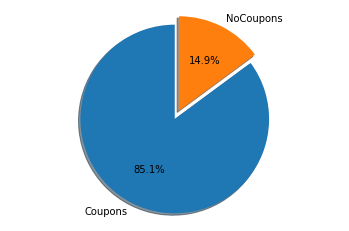

In [15]:
withoutCoupon = df.loc[df['coupon'].isna()].shape[0]
withCoupon = df.loc[~df['coupon'].isna()].shape[0]

print("Classes without coupons: ",withoutCoupon)
print("Classes with coupons: ",withCoupon)

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Coupons', 'NoCoupons'
sizes = [withCoupon, withoutCoupon]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [16]:
print("number of likes of class without coupons: ", df.loc[df['coupon'].isna()]['likes'].mean())
print("number of likes of class with coupons: ", df.loc[~df['coupon'].isna()]['likes'].mean())


number of likes of class without coupons:  340.6862745098039
number of likes of class with coupons:  2036.1454753722794


## Exploring Creator Social Media Information

In [17]:
import requests
import json
from urllib3.exceptions import HTTPError

We load the socialmedia file

In [18]:
socialdf = pd.read_excel(os.path.join(os.getcwd(),"Data","Class101CreatorSocialMedia.xlsx"))

### Youtube Data Acquisition

We read the YoutubeData API Key from the apikey json file

In [19]:
with open('/Users/CheHoon/cheprojects/class101/myapi.json', 'r') as f:
    apifile = json.load(f)

myAPIKey = apifile['apikey']

We find the total number of youtube accounts and instagram accounts below

In [20]:
youtubeCount = 0
instagramCount = 0
YTChannels = []

for row in socialdf['creatorSocialMedia'].iteritems():
    if "youtube" in row[1]:
        youtubeCount += 1
        YTChannels.append(row[1])
    if "instagram" in row[1]:
        instagramCount += 1
    
print("youtube: ", youtubeCount)
print("instagram: ", instagramCount)

youtube:  603
instagram:  1310


We define a few functions that extracts the user ids below

In [21]:
def extractIndexes(url, slashNum):
    '''
    Helper function. Returns the start and end indexes of userIDs from URL.
    '''
    slash = 0
    start = 0
    startBool = True
    end = 0
    
    for i, v in enumerate(url):
        if v == '/':
            slash += 1
        if slash == slashNum and startBool:
            start = i
            startBool = False
        if v == '/' and slash > slashNum:
            end = i
            return start, end
        if v == '&' or v == '?':
            end = i
            return start, end
    
    return start, end
    

def extractIDs(urlList):
    '''
    Given list of social media urls, extracts and returns list of user ids.
    '''
    IDList = []
    
    for url in urlList:
    
        if "youtube.com/channel/" in url or "youtube.com/c/" in url or "youtube.com/user/" in url:
            
            start, end = extractIndexes(url,4)
            
            if end == 0:
                IDList.append(url[start+1:])
                
            else:
                IDList.append(url[start+1:end])
                
        else:
            
            start, end = extractIndexes(url,3)
            
            if end == 0:
                IDList.append(url[start+1:])
            else:
                IDList.append(url[start+1:end])
    
    return IDList

We define a function that performs API requests to the YoutubeDataAPI, and retrieve information about the view counts, number of subscribers, and number of videos of each channel. The function exports a json file of the accumulated information

In [22]:
def getYoutubeSubscribers(IDList, myAPIKey, directoryPath=os.getcwd(), filename = "youtubedata.json"):
    '''
    Exports json file of youtube subscriber data. Uses YoutubeDataAPI v3.
    '''
    jsonInfo = {'data':[]}
    
    for creatorID in IDList:

        try:
            url = f"https://youtube.googleapis.com/youtube/v3/channels?part=statistics&id={creatorID}&key={myAPIKey}"
            response = requests.get(url)
            ytjson = response.json()
            if 'items' in ytjson:
                jsonInfo['data'].append({'creatorID':creatorID, 'stats':ytjson['items'][0]['statistics']})

        except HTTPError as e:
            print("HTTP Error Detected")

    with open(f"{directoryPath}/{filename}",'w') as f:
        json.dump(jsonInfo, f)
    

We invoke the `getYoutubeSubscribers` function below.
Function commented after invoked once. Uncomment to run.

In [23]:
#getYoutubeSubscribers(IDList, myAPIKey,os.path.join(os.getcwd(),"Data"))

We define a function `readYoutubeJson` that reads in the json file that contains youtube data

In [24]:
def readYoutubeJson(directoryPath=os.getcwd(), filename="youtubedata.json"):
    
    with open(f"{directoryPath}/{filename}", 'r') as f:
        jsonData = json.load(f)
    
    return jsonData

We read the youtubejson file using the `readYoutubeJson` function

In [25]:
ytjson = readYoutubeJson(os.path.join(os.getcwd(),"Data"))

In [26]:
#construct total dataframe
youtube_df = pd.DataFrame(columns = ['creatorID', 'YoutubeSubscribers', 'YoutubeViews', 'YoutubeVideos'])

#loop through json data and append each youtube data to total dataframe
for element in ytjson['data']:
    creatorID = element['creatorID']
    views = element['stats']['viewCount']
    videos = element['stats']['videoCount']
    if element['stats']['hiddenSubscriberCount'] == False:
        subscribers = element['stats']['subscriberCount']
    else:
        subscribers = None
    
    rowdf = pd.DataFrame({'creatorID':[creatorID], 'YoutubeSubscribers':[subscribers],'YoutubeViews':[views],'YoutubeVideos':[videos]})
    
    youtube_df = youtube_df.append(rowdf)


In [27]:
#get list of creator ids
creatorIDs = extractIDs(socialdf['creatorSocialMedia'])
#append creatorID column to dataframe
socialdf['creatorID'] = creatorIDs

socialdf = socialdf.merge(youtube_df, on='creatorID', how='left')

#rearranging column order
socialdf = socialdf[['creatorID', 'creatorName','creatorSocialMedia','YoutubeSubscribers','YoutubeViews','YoutubeVideos']]

#renaming creatorSocialMedia column
socialdf = socialdf.rename(columns={'creatorSocialMedia':'socialMediaURL'})

In [28]:
#socialdf.to_csv(os.path.join(os.getcwd(),"Data","SocialMediaData.csv"))

### Analyze Social Media Data

In [29]:
socialdf2 = pd.read_csv(os.path.join(os.getcwd(),"Data","SocialMediaData.csv"))

In [30]:
socialdf2

Unnamed: 0                 creatorID     creatorName  \
0              0  UCoyA-0efbgYY7GAAvrRH0ZA      [ÎåÄÎ∞ïÎïÖÍæº] Ï†ÑÏùÄÍ∑ú   
1              1                125_yu.nim             125   
2              2                  3am_sesi  12DOSTUDIO(ÏÑ∏Ïãú)   
3              3                    14.day             14Ïùº   
4              4                 akqjatk12           1ÏñµÏπòÌä∏ÌÇ§   
...          ...                       ...             ...   
2634        2634                    eesppt             „Öî„Öî„ÖÖ   
2635        2635                    eesppt             „Öî„Öî„ÖÖ   
2636        2636  UCkk7Lu7gKcXKl9BAru13PNA             „Öî„Öî„ÖÖ   
2637        2637  UCPWhB4mA6xaopNTrwo_HKLw   ËààÌïòÍ≤å ÎèÑÏôÄÎìúÎ¶¨Îäî Ìù•ÏÜåÏû•   
2638        2638              seodaewoong7   ËààÌïòÍ≤å ÎèÑÏôÄÎìúÎ¶¨Îäî Ìù•ÏÜåÏû•   

                                         socialMediaURL  YoutubeSubscribers  \
0     https://www.youtube.com/channel/UCoyA-0efbgYY7...             68300.0   
1                       http://instagram.com/125_yu.nim                 NaN   
2                        https://instagram.com/3am_sesi                 NaN   
3                          https://instagram.com/14.day                 NaN   
4                      https://cafe.naver.com/akqjatk12                 NaN   
...                                                 ...                 ...   
2634                    https://www.facebook.com/eesppt                 NaN   
2635                https://www.pinterest.co.kr/eesppt/                 NaN   
2636  https://www.youtube.com/channel/UCkk7Lu7gKcXKl...              4890.0   
2637  https://www.youtube.com/channel/UCPWhB4mA6xaop...              4640.0   
2638            https://www.instagram.com/seodaewoong7/                 NaN   

      YoutubeViews  YoutubeVideos  
0        3263655.0          244.0  
1              NaN            NaN  
2              NaN            NaN  
3              NaN            NaN  
4              NaN            NaN  
...            ...            ...  
2634           NaN            NaN  
2635           NaN            NaN  
2636      246928.0           28.0  
2637      157235.0          156.0  
2638           NaN            NaN  

[2639 rows x 7 columns]

In [31]:
ytSubscribers = socialdf2.loc[~socialdf2['YoutubeSubscribers'].isna()]

bronze = ytSubscribers.loc[ytSubscribers['YoutubeSubscribers'] >= 10000]
silver = ytSubscribers.loc[ytSubscribers['YoutubeSubscribers'] >= 100000]
gold = ytSubscribers.loc[ytSubscribers['YoutubeSubscribers'] >= 1000000]
print("Creators with bronze play button: ", bronze.shape[0])
print("Creators with silver play button: ", silver.shape[0])
print("Creators with gold play button: ", gold.shape[0])

Creators with bronze play button:  163
Creators with silver play button:  62
Creators with gold play button:  2


In [32]:
#ytSubscribers = ytSubscribers.drop(['index','level_0'], axis=1)

In [33]:
ytSubscribers = ytSubscribers.drop(['Unnamed: 0'], axis = 1)

In [34]:
ytSubscribers = ytSubscribers.merge(df, on=['creatorName'])

In [35]:
ytSubscribers = ytSubscribers.drop_duplicates()
ytSubscribers = ytSubscribers.reset_index()
ytSubscribers

index                 creatorID           creatorName  \
0        0  UCoyA-0efbgYY7GAAvrRH0ZA            [ÎåÄÎ∞ïÎïÖÍæº] Ï†ÑÏùÄÍ∑ú   
1        2  UCotiBSGv8a064wPti8tlUEA            1ÌîÑÎ°úÎßàÏºÄÌÑ∞ ÏÑúÎèôÎØº   
2        4  UC0eKU-46gbDgPZYrc3NC9dQ                    43   
3        6  UCfHxz4MDtLkBHD_H2oDNnmw                 Aisha   
4        8  UCItAfC3SvI5B4jmy9M6jgOg  d.y artist(d.y ÏïÑÌã∞Ïä§Ìä∏)   
..     ...                       ...                   ...   
450    900  UCZnhSaM2Oa5AtETFCSlzyyw                  ÌûàÏÜåÌé†Ìä∏   
451    902  UChqh8YFeigoD_uW4PfS7iFQ                 ÌûêÎßÅÎ†àÏãúÌîº   
452    904  UCkk7Lu7gKcXKl9BAru13PNA                   „Öî„Öî„ÖÖ   
453    905  UCkk7Lu7gKcXKl9BAru13PNA                   „Öî„Öî„ÖÖ   
454    908  UCPWhB4mA6xaopNTrwo_HKLw         ËààÌïòÍ≤å ÎèÑÏôÄÎìúÎ¶¨Îäî Ìù•ÏÜåÏû•   

                                        socialMediaURL  YoutubeSubscribers  \
0    https://www.youtube.com/channel/UCoyA-0efbgYY7...             68300.0   
1    https://www.youtube.com/channel/UCotiBSGv8a064...                70.0   
2    https://www.youtube.com/channel/UC0eKU-46gbDgP...              8330.0   
3    https://www.youtube.com/channel/UCfHxz4MDtLkBH...                34.0   
4    https://youtube.com/channel/UCItAfC3SvI5B4jmy9...              4730.0   
..                                                 ...                 ...   
450  https://www.youtube.com/channel/UCZnhSaM2Oa5At...              3640.0   
451  https://www.youtube.com/channel/UChqh8YFeigoD_...               676.0   
452  https://www.youtube.com/channel/UCkk7Lu7gKcXKl...              4890.0   
453  https://www.youtube.com/channel/UCkk7Lu7gKcXKl...              4890.0   
454  https://www.youtube.com/channel/UCPWhB4mA6xaop...              4640.0   

     YoutubeViews  YoutubeVideos  \
0       3263655.0          244.0   
1           780.0            1.0   
2        163242.0           20.0   
3           156.0            3.0   
4        716716.0          144.0   
..            ...            ...   
450      231521.0           39.0   
451      156901.0           76.0   
452      246928.0           28.0   
453      246928.0           28.0   
454      157235.0          156.0   

                                             className        category  \
0                    Ïù¥Ï†úÎäî ÏïÑÌååÌä∏Î≥¥Îã§ ÌÜ†ÏßÄ! ÌÜ†ÏßÄ Ìà¨ÏûêÎ°ú ÏõîÏÑ∏ Ï≤ú ÎßåÏõê Î∞õÎäî Î≤ï             Ïû¨ÌÉúÌÅ¨   
1      [ÌÅ¥ÎûòÏä§Î¨∏Î∞©Íµ¨] Ïø†Ìå° ÌååÌä∏ÎÑàÏä§ÏôÄ Ï†úÌú¥ ÎßàÏºÄÌåÖÏúºÎ°ú ÏßëÏóêÏÑú Ïõî 200Îßå Ïõê Î∂ÄÏàòÏùµ ÎßåÎì§Í∏∞            Ï∞ΩÏóÖÎ∂ÄÏóÖ   
2         [ÌÅ¥ÎûòÏä§Î¨∏Î∞©Íµ¨] Î™ΩÍ∏ÄÎ™ΩÍ∏Ä ÏÜúÏÇ¨ÌÉïÍ∞ôÏù¥, ÎèôÌôîÍ∞ôÏùÄ ÏÉâÍ∞êÏúºÎ°ú Ï±ÑÏö∞Îäî ÏïÑÏù¥Ìå®Îìú ÏùºÎü¨Ïä§Ìä∏  digitalDrawing   
3          [ÌÅ¥ÎûòÏä§Î¨∏Î∞©Íµ¨] ÌÅ¥ÎûòÏãùÌïú Í∞êÏÑ± Í∞ÄÎìù, ÏïÑÏù¥Ìå®ÎìúÎ°ú ÏãúÏûëÌïòÎäî Î™®Îçò ÏòÅÎ¨∏ Ï∫òÎ¶¨Í∑∏ÎùºÌîº     calligraphy   
4                                 ÎÇ¥ ÏÜêÏúºÎ°ú ÎßåÎì† ÏûëÌíà Í∑∏Î¶¨Í≥† ÌûêÎßÅÍπåÏßÄ             ÌîåÎùºÏõå   
..                                                 ...             ...   
450      [ÌÅ¥ÎûòÏä§Î¨∏Î∞©Íµ¨] ÎãàÎì§Ìé†Ìä∏ Í∏∞Ï¥à, Ïã¨Ìôî, ÏùëÏö©ÍπåÏßÄ ÌïúÎ≤àÏóê! ÌûàÏÜåÏùò Í≥†ÏñëÏù¥ ÎãàÎì§Ìé†Ìä∏!            Ìé†Ìä∏ÏïÑÌä∏   
451                 [ÌÅ¥ÎûòÏä§Î¨∏Î∞©Íµ¨] ÌòÑÏßÅ ÏöîÎ¶¨ Í∞ïÏÇ¨Í∞Ä ÏïåÎ†§Ï£ºÎäî 1Ïù∏Î∂Ñ ÌûêÎßÅ Î†àÏãúÌîº          ÎçîÏÉàÎ°úÏö¥ÏöîÎ¶¨   
452          [üî•ÏÉÅÎ∞òÍ∏∞ Ï¥ùÍ≤∞ÏÇ∞] „Öî„Öî„ÖÖÏùò ÌååÏõåÌè¨Ïù∏Ìä∏ Ïó∞Íµ¨ÏÜåÏóêÏÑú Ìï®Íªò PPTÏóê ÏûÖÎçïÌï¥Ïöî!            ÏßÅÎ¨¥ÍµêÏú°   
453           [üèÜBESTÌäπÍ∞Ä] "PPTÎèÑ ÏòàÏà†Ïù¥Îã§" „Öî„Öî„ÖÖÏ≤òÎüº Í∞ÑÏßÄÎÇòÎäî PPT ÎßåÎì§Í∏∞            ÏßÅÎ¨¥ÍµêÏú°   
454  [ÌÅ¥ÎûòÏä§Î¨∏Î∞©Íµ¨] 'Î∏åÎûúÎìú'Ï†ÅÏúºÎ°ú ÏÇ¨ÏóÖÍ≥ÑÌöçÏÑú Ïì∞Îäî ÎπÑÍ≤∞! (+ÎîîÏûêÏù∏ÏîΩÌÇπ +Î∏åÎûúÎìúÏª®ÏÖâ ...            Ï∞ΩÏóÖÎ∂ÄÏóÖ   

                 topic  ... originalPrice discountAmount  couponDiscount  \
0    Ï¥àÎ≥¥ÏûêÎì§ÏùÑ ÏúÑÌïú ÌÜ†ÏßÄ ÏûÖÎ¨∏ Í∞ïÏùò  ...      339000.0        60000.0         50000.0   
1                Ïâ¨Ïö¥ Î∂ÄÏóÖ  ...      199000.0        40300.0         40000.0   
2             Ï∫êÎ¶≠ÌÑ∞ ÏùºÎü¨Ïä§Ìä∏  ...  

In [36]:
ytSubscribers['playbutton'] = "None"

for index, value in ytSubscribers['YoutubeSubscribers'].items():
    if value >= float(10000):
        ytSubscribers.iloc[index, ytSubscribers.columns.get_loc('playbutton')] = "bronze"
    if value >= float(100000):
        ytSubscribers.iloc[index, ytSubscribers.columns.get_loc('playbutton')] = "silver"
    if value >= float(1000000):
        ytSubscribers.iloc[index, ytSubscribers.columns.get_loc('playbutton')] = "gold"

playbutton = ytSubscribers.groupby('playbutton')
playbutton.agg({'likes':['mean','median'], 'satisfactionPct':['mean','median'], 'monthlyPayment':['mean','median'], 'className':'count'})

likes          satisfactionPct        monthlyPayment  \
                    mean   median            mean median           mean   
playbutton                                                                
None         1435.159259    676.5       96.595745   98.0   41235.730769   
bronze       1903.370690    994.5       96.887640   98.0   39221.852174   
gold        20726.000000  20726.0       97.000000   97.0   24740.000000   
silver       2970.584615   1591.0       97.740000   98.0   39069.753846   

                    className  
             median     count  
playbutton                     
None        38681.0       270  
bronze      35900.0       116  
gold        24740.0         2  
silver      37100.0        65

In [37]:
noYT = socialdf2.loc[socialdf2['YoutubeSubscribers'].isna()]
noYT = noYT.drop(['socialMediaURL'],axis=1)
noYT = noYT.merge(df, on = "creatorName")
noYT = noYT.drop_duplicates()

print("Youtube average number of likes:", ytSubscribers['likes'].mean())
print("No Youtube average number of likes:", noYT['likes'].mean())

Youtube average number of likes: 1860.5386313465783
No Youtube average number of likes: 1760.5292915531336


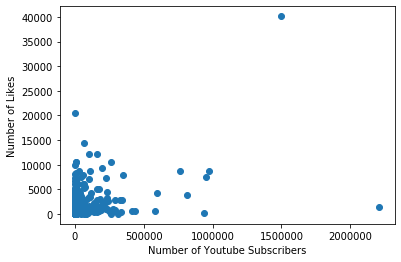

In [38]:
plt.scatter(ytSubscribers['YoutubeSubscribers'],ytSubscribers['likes'])
plt.xlabel("Number of Youtube Subscribers")
plt.ylabel("Number of Likes")
plt.show()

In [39]:
#sns.lmplot(x='YoutubeSubscribers', y='likes', data=ytSubscribers, hue='playbutton', fit_reg=False)

### Community Posts

In [40]:
import seaborn as sns

In [41]:
community = df.loc[~df['communityPosts'].isna(),]

nocommunity = df.loc[df['communityPosts'].isna(),]

print("Community average likes: ",community['likes'].mean())
print("No Community average likes: ",nocommunity['likes'].mean())

print("Num Classes with community: ", community.shape[0])
print("Num Classes without community: ", nocommunity.shape[0])

Community average likes:  2107.899637243047
No Community average likes:  434.4070351758794
Num Classes with community:  3348
Num Classes without community:  818


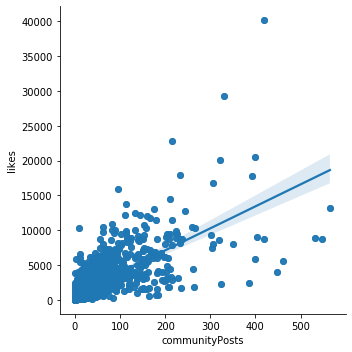

In [42]:
sns.lmplot(x='communityPosts', y='likes', data=community, fit_reg=True)

### Feedback Vs. No Feedback

In [43]:
feedback = df.loc[~df['feedbackNum'].isna()]
nofeedback = df.loc[df['feedbackNum'].isna()]

print("classes with creator feedback: ", feedback['likes'].mean())
print("classes without creator feedback: ", nofeedback['likes'].mean())

classes with creator feedback:  2375.9872773536895
classes without creator feedback:  1642.915611814346


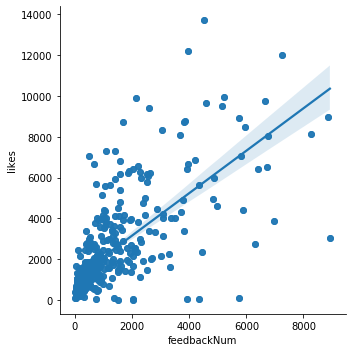

In [44]:
sns.lmplot(x='feedbackNum', y='likes', data=feedback, fit_reg=True)

In [45]:
np.corrcoef(feedback['feedbackNum'], feedback['likes'])

array([[1.        , 0.69163943],
       [0.69163943, 1.        ]])